# Density of solids & liquids 

Alvin He    
11/23/2022  
Chemistry Honors 1° 

### Introduction to determinting density using graphical analysis

Density is the relationship between mass and volume, specificially $\frac{mass}{volume}$. The relationship equation is similar to a slope equation, $\frac{\Delta y}{\Delta x}$. Which means we can set the y-axis of the graph to mass and the x-axis to volume and generate a line whose slope is the density we want to find. However, most data don't line up in a perfect straight line. We can solve that with least-square analysis which generate a line of best fit that we can calculate a slope from. 

### Data Analysis


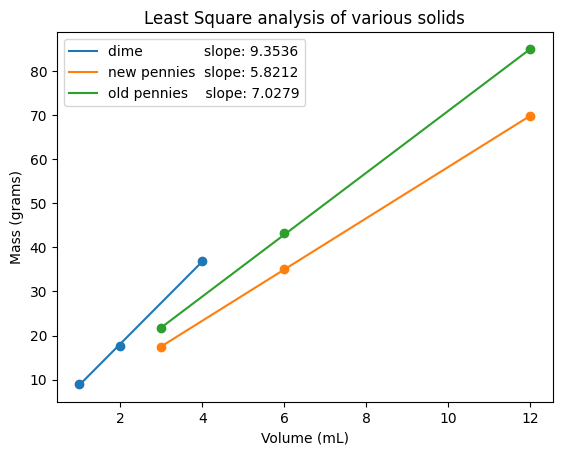

In [19]:
import matplotlib.pyplot as plt  # plotting & visuals
import numpy as np
from sklearn.linear_model import LinearRegression # simple least squares, easier machine learning model to use 

rawData = {
    'alcohol': [3.61, 5], #3.61g / 5 ml
    'water': [2.62, 5], # 2.62g / 5ml

    # of coin, mass(g), volume(ml)
    'dime': [
        [4, 9.1, 1], 
        [8, 17.65, 2],
        [16, 37, 4]
    ], 
    # 'dimeMassVsVolume': {
    #     'mass': [[9.1], [17.65], [37]], 
    #     'volume': [[1], [2], [4]]
    # },
    'dimeMassVsVolume': {
        'mass': np.array([[9.1], [17.65], [37]]), 
        'volume': np.array([[1], [2], [4]])
    },

    'new_penny': [
        [7, 17.49, 3],
        [14, 35.1, 6], 
        [28, 69.91, 12]
    ],
    'new_pennyMassVsVolume': {
        'mass': np.array([[17.49], [35.1], [69.91]]), 
        'volume': np.array([[3], [6], [12]])
    },


    'old_penny': [
        [7, 21.65, 3], 
        [14, 43.23, 6],
        [28, 85, 12]
    ],
    'old_pennyMassVsVolume': {
        'mass': np.array([[21.65], [43.23], [85]]),
        'volume': np.array([[3], [6], [12]])
    }
}

calculatedData = {
    # g/ml
    'alcohol': 0.722,  # 3.61g / 5 ml
    'water': 0.524,  # 2.62g / 5ml

    # of coins is ignored in calculation since we already have the mass
    'dime': [
        [9.1],
        [8.825],
        [9.25]
    ],

    'new_penny': [
        [5.83],
        [5.85],
        [5.826]
    ],

    'old_penny': [
        [7.217],
        [7.205],
        [7.08]
    ]
}

# machine learning model for least squares analysis
def analyze(data2DArray):
    lr = LinearRegression()
    x = data2DArray['volume']  # x is volume
    y = data2DArray['mass']  # y is mass
    lr.fit(x, y)
    prediction = lr.predict(x)  # generate the line of best fit
    slope = float(np.round(lr.coef_, 4)[0]) # slope(g/ml) rounded to 4 decimal places for accuracy 
    return prediction, slope

# draw the scatter graph and the line of best fit
def graph(axis, data2DArray, predictOut):
    x = data2DArray['volume']
    axis.scatter(x, data2DArray['mass'])
    lineOfBestFit, = axis.plot(x, predictOut)
    return lineOfBestFit


# set up the graphing
ax = plt.gca()
ax.set_xlabel('Volume (mL)')
ax.set_ylabel('Mass (grams)')
ax.set_title('Least Square analysis of various solids')

# dime 
pred, dimeSlope = analyze(rawData['dimeMassVsVolume'])
dimeLine = graph(ax, rawData['dimeMassVsVolume'], pred)


# new penny
pred, new_pennySlope = analyze(rawData['new_pennyMassVsVolume'])
new_pennyLine = graph(ax, rawData['new_pennyMassVsVolume'], pred)

# old penny
pred, old_pennySlope = analyze(rawData['old_pennyMassVsVolume'])
old_pennyLine = graph(ax, rawData['old_pennyMassVsVolume'], pred)

#legends and labels 
ax.legend([dimeLine, new_pennyLine, old_pennyLine], ['dime              slope: %s' % dimeSlope, 'new pennies  slope: %s' % new_pennySlope, 'old pennies    slope: %s' % old_pennySlope])




